<a href="https://colab.research.google.com/github/Makushiin/CS559-Projects/blob/main/CS559A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

# Your input image
image = np.array([
    [2, 2, 2, 2, 2, 2, 2, 2],
    [2, 2, 2, 2, 2, 2, 2, 7],
    [2, 2, 2, 2, 2, 2, 7, 7],
    [2, 2, 2, 2, 2, 7, 7, 7],
    [2, 2, 2, 2, 7, 7, 7, 7],
    [2, 2, 2, 7, 7, 7, 7, 7],
    [2, 2, 7, 7, 7, 7, 7, 7],
    [2, 7, 7, 7, 7, 7, 7, 7]
], dtype=np.uint8)

# Compute gradients
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)[1:-1, 1:-1]  # Ignore border
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)[1:-1, 1:-1]  # Ignore border

# Compute gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Print the results
print("Gradient X:\n", gradient_x)
print("\nGradient Y:\n", gradient_y)
print("\nGradient Magnitude:\n", gradient_magnitude)


Gradient X:
 [[ 0.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  5. 15. 15.]
 [ 0.  0.  5. 15. 15.  5.]
 [ 0.  5. 15. 15.  5.  0.]
 [ 5. 15. 15.  5.  0.  0.]
 [15. 15.  5.  0.  0.  0.]]

Gradient Y:
 [[ 0.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  5. 15. 15.]
 [ 0.  0.  5. 15. 15.  5.]
 [ 0.  5. 15. 15.  5.  0.]
 [ 5. 15. 15.  5.  0.  0.]
 [15. 15.  5.  0.  0.  0.]]

Gradient Magnitude:
 [[ 0.          0.          0.          0.          7.07106781 21.21320344]
 [ 0.          0.          0.          7.07106781 21.21320344 21.21320344]
 [ 0.          0.          7.07106781 21.21320344 21.21320344  7.07106781]
 [ 0.          7.07106781 21.21320344 21.21320344  7.07106781  0.        ]
 [ 7.07106781 21.21320344 21.21320344  7.07106781  0.          0.        ]
 [21.21320344 21.21320344  7.07106781  0.          0.          0.        ]]


In [ ]:
import numpy as np

# Define the input image
input_image = np.array([
    [2, 2, 2, 2, 2, 2, 2, 2],
    [2, 2, 2, 2, 2, 2, 2, 7],
    [2, 2, 2, 2, 2, 2, 7, 7],
    [2, 2, 2, 2, 2, 7, 7, 7],
    [2, 2, 2, 2, 7, 7, 7, 7],
    [2, 2, 2, 7, 7, 7, 7, 7],
    [2, 2, 7, 7, 7, 7, 7, 7],
    [2, 7, 7, 7, 7, 7, 7, 7]
])

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Function to apply Sobel operator
def apply_sobel(img, kernel):
    rows, cols = img.shape
    output = np.zeros((rows - 2, cols - 2))
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = img[i-1:i+2, j-1:j+2]
            output[i-1, j-1] = np.sum(region * kernel)
    return output

# Apply Sobel operators
gradient_x = apply_sobel(input_image, sobel_x)
gradient_y = apply_sobel(input_image, sobel_y)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Print the output images
print("Gradient X:\n", gradient_x)
print("\nGradient Y:\n", gradient_y)
print("\nGradient Magnitude:\n", gradient_magnitude)


Gradient X:
 [[ 0.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  5. 15. 15.]
 [ 0.  0.  5. 15. 15.  5.]
 [ 0.  5. 15. 15.  5.  0.]
 [ 5. 15. 15.  5.  0.  0.]
 [15. 15.  5.  0.  0.  0.]]

Gradient Y:
 [[ 0.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  5. 15. 15.]
 [ 0.  0.  5. 15. 15.  5.]
 [ 0.  5. 15. 15.  5.  0.]
 [ 5. 15. 15.  5.  0.  0.]
 [15. 15.  5.  0.  0.  0.]]

Gradient Magnitude:
 [[ 0.          0.          0.          0.          7.07106781 21.21320344]
 [ 0.          0.          0.          7.07106781 21.21320344 21.21320344]
 [ 0.          0.          7.07106781 21.21320344 21.21320344  7.07106781]
 [ 0.          7.07106781 21.21320344 21.21320344  7.07106781  0.        ]
 [ 7.07106781 21.21320344 21.21320344  7.07106781  0.          0.        ]
 [21.21320344 21.21320344  7.07106781  0.          0.          0.        ]]


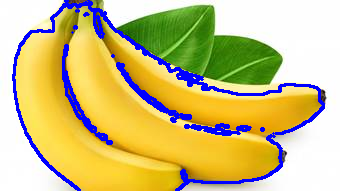

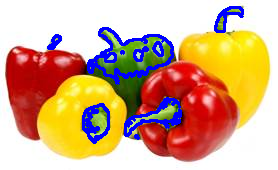

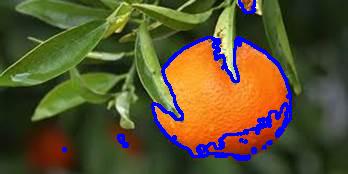

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_and_color_boundary(image_path, lower_color_bound, upper_color_bound):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Threshold the image
    mask = cv2.inRange(hsv_image, lower_color_bound, upper_color_bound)

    # Find edges
    edges = cv2.Canny(mask, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours in blue
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)

    # Display the result
    cv2_imshow(image)

# Define the color bounds manually or programmatically
banana_bounds = (np.array([20, 100, 100]), np.array([30, 255, 255]))
bell_pepper_bounds = (np.array([35, 100, 100]), np.array([85, 255, 255]))
orange_bounds = (np.array([10, 100, 100]), np.array([20, 255, 255]))

# Process each image
for image_path, bounds in zip(['banana.jpg', 'bellpepper.jpg', 'orange.jpg'],
                               [banana_bounds, bell_pepper_bounds, orange_bounds]):
    detect_and_color_boundary(image_path, *bounds)


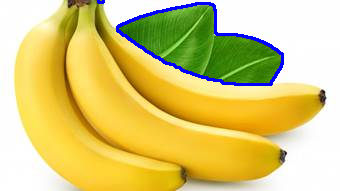

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_boundary(image_path, color_range_lower, color_range_upper, boundary_color):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV format for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the color range
    mask = cv2.inRange(hsv, color_range_lower, color_range_upper)

    # Use morphological operations to remove small noise
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Use the Canny edge detector on the mask
    edges = cv2.Canny(mask, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours
    cv2.drawContours(image, contours, -1, boundary_color, 2)

    # Show the result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# For detecting the boundary of the leaves in the given image:
# Adjust the HSV range for a more specific green (typical for leaves)
green_lower = np.array([35, 40, 40])
green_upper = np.array([80, 255, 255])
boundary_color_blue = (255, 0, 0)  # BGR format for blue color

detect_boundary('banana.jpg', green_lower, green_upper, boundary_color_blue)


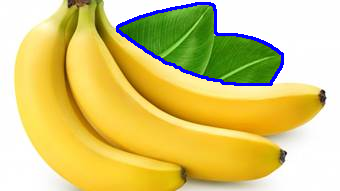

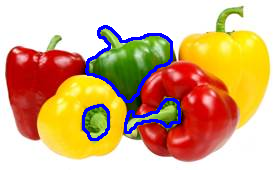

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_boundary(image_path, color_range_lower, color_range_upper, boundary_color):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV format for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the color range
    mask = cv2.inRange(hsv, color_range_lower, color_range_upper)

    # Use morphological operations to remove small noise
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Use the Canny edge detector on the mask
    edges = cv2.Canny(mask, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours, but filter out small contours (possibly stems or noise)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust this threshold as needed
            cv2.drawContours(image, [contour], -1, boundary_color, 2)

    # Show the result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# For the banana image:
green_lower_leaves = np.array([35, 40, 40])
green_upper_leaves = np.array([80, 255, 255])
detect_boundary('banana.jpg', green_lower_leaves, green_upper_leaves, (255, 0, 0))

# For the bell pepper image:
green_lower_pepper = np.array([40, 50, 50])
green_upper_pepper = np.array([90, 255, 255])
detect_boundary('bellpepper.jpg', green_lower_pepper, green_upper_pepper, (255, 0, 0))


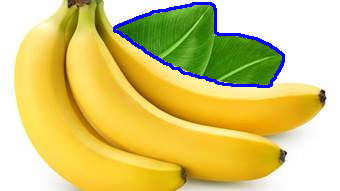

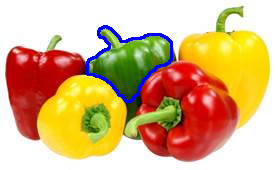

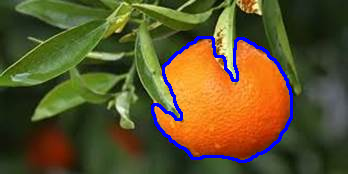

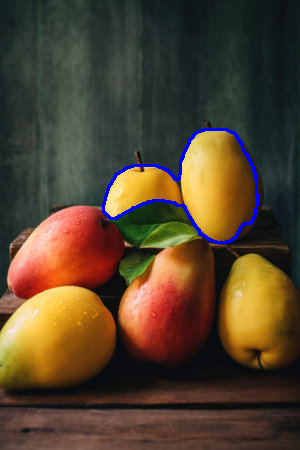

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_boundary(image_path, color_range_lower, color_range_upper, boundary_color):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to HSV format for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the color range
    mask = cv2.inRange(hsv, color_range_lower, color_range_upper)

    # Use morphological operations to remove small noise
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Use the Canny edge detector on the mask
    edges = cv2.Canny(mask, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours, filtering based on size and aspect ratio
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h

        if cv2.contourArea(contour) > 1000 and aspect_ratio < 2.5:  # Adjust these thresholds as needed
            cv2.drawContours(image, [contour], -1, boundary_color, 2)

    # Show the result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# For the banana image:
green_lower_leaves = np.array([30, 30, 30])
green_upper_leaves = np.array([80, 255, 255])
detect_boundary('banana.jpg', green_lower_leaves, green_upper_leaves, (255, 0, 0))

# For the bell pepper image:
green_lower_pepper = np.array([35, 40, 40])
green_upper_pepper = np.array([90, 255, 255])
detect_boundary('bellpepper.jpg', green_lower_pepper, green_upper_pepper, (255, 0, 0))

# For the orange image:
orange_lower = np.array([5, 50, 50])
orange_upper = np.array([20, 255, 255])
detect_boundary('orange.jpg', orange_lower, orange_upper, (255, 0, 0))

# For the mango image:
mango_lower = np.array([10, 50, 50])
mango_upper = np.array([30, 255, 255])
detect_boundary('mango.jpg', mango_lower, mango_upper, (255, 0, 0))

In [ ]:
import cv2
import numpy as np

def get_car_contour(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour is the car
    car_contour = max(contours, key=cv2.contourArea)

    return car_contour

def get_car_width_in_pixels(car_contour):
    # Get the bounding rectangle of the car contour
    x, y, w, h = cv2.boundingRect(car_contour)
    return w

def calculate_distance(car_width_in_pixels1, car_width_in_pixels2, actual_car_width):
    # Calculate the object to image size ratio for both frames
    ratio1 = actual_car_width / car_width_in_pixels1
    ratio2 = actual_car_width / car_width_in_pixels2

    # Calculate the distance the car has traveled between the two frames
    distance = (ratio2 - ratio1) * actual_car_width
    return distance

def main():
    # Path to the two car images
    image_path1 = 'car1.png'
    image_path2 = 'car2.png'

    # Actual width of the car in meters (or any other unit)
    actual_car_width = 4.605  # Example value, you should replace with actual value

    # Get the car contour for both images
    car_contour1 = get_car_contour(image_path1)
    car_contour2 = get_car_contour(image_path2)

    # Get the car width in pixels for both images
    car_width_in_pixels1 = get_car_width_in_pixels(car_contour1)
    car_width_in_pixels2 = get_car_width_in_pixels(car_contour2)

    # Calculate the distance the car has traveled between the two frames
    distance = calculate_distance(car_width_in_pixels1, car_width_in_pixels2, actual_car_width)

    print(f"The car traveled approximately {distance} meters between the two frames.")

if __name__ == "__main__":
    main()


The car traveled approximately 0.04457973985021681 meters between the two frames.
